## Performance Measure

Loading the dataset of handwritten images  
which is a set of 70,000 small images of digits  
each image has 28*28(784) features

In [111]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [112]:
from scipy.io import loadmat
mnist = loadmat('../../data-2019/mnist-original.mat')
mnist_data = mnist['data'].T
mnist_label = mnist['label'].T

Display some gray pic from the dataset

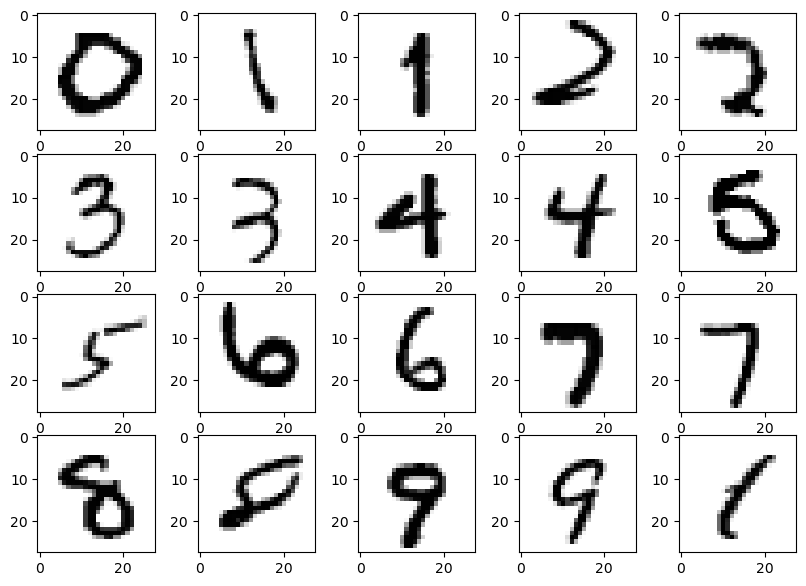

In [113]:
plt.figure(figsize=(10,7))
for i in range(20):
    idx = 1+i
    plt.subplot(4,5,idx)
    plt.imshow(mnist_data[i*3000+5000,:].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

select train sample and test sample

In [114]:
X_train, X_test= mnist_data[:60000], mnist_data[60000:]
y_train, y_test = mnist_label[:60000], mnist_label[60000:]

In [115]:
# shuffle the training dataset
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

### Cross-validation  

![title](./img/crossvalidation.png)

![title](./img/crossvalidation_dataset.png)

Choose a dataset that making this experiment as binary classification  
dataset whose label is 5, to identify the sample is 5 or not

In [116]:
y_train_5 = (y_train==5).ravel()
y_test_5 = (y_test==5).ravel()

In [117]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=10, random_state=42)

cross validation method

In [118]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
# cross validation for 3 times  
# and the output with 3 values represents the accuracy for each group

array([0.96845, 0.9591 , 0.9521 ])

### Confusion Matrix

Recall - What proportion of actual positives was identified correctly.

In [120]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53334,  1245],
       [ 1162,  4259]])

negative class[ [true negatives, false positives],  
positive class  [false negatives, true positives] ]
* true negatives - 53,334 correctly identified, actually not 5 and predict not 5
* false positives - 1,245 incorrectly identified, actually not 5 but predict to 5
* false negatives - 1,162 incorrectly identified, actually 5 but predict to not 5
* true positives - 4,259 correctly identified, actually 5 and predict to 5  
A perfect classifier only have true negatives and true positives.

![recall](./img/precision_recall.png)

precision and recall

In [124]:
from sklearn.metrics import precision_score,recall_score
print('precision score is',precision_score(y_train_5, y_train_pred))
print('recall score is',recall_score(y_train_5, y_train_pred))

precision score is 0.7738008720930233
recall score is 0.7856484043534403


$F_1$ score (harmonic mean) is an indicator that combining Precision and Recall values into one.  
$$F_1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}}$$  
$F_1$ give more weight to the lower score between precision and recall

In [125]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7796796338672769

How does Threshold affect the outcome  
```sgd_clf``` the classifier automatically shows True of False according its default threshold.

In [129]:
y_scores = sgd_clf.decision_function([X_train[35000]]) 
y_scores
# in fact the model returns a value after prediction.

array([-46391.39910402])

In [130]:
# If setting the threshold is t=0  
# we can decision the outcomes
t = 0
y_pred = (y_scores >t)
y_pred

array([False])

![title](./img/threshold.png)  
Different threshold comes with different precision and recall.  

```precision_recall_curve``` can return precision and recall pairs under all different thresholds

In [137]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [139]:
thresholds.shape 
# means there are 60,000 different thresholds for this experiment  

(60000,)

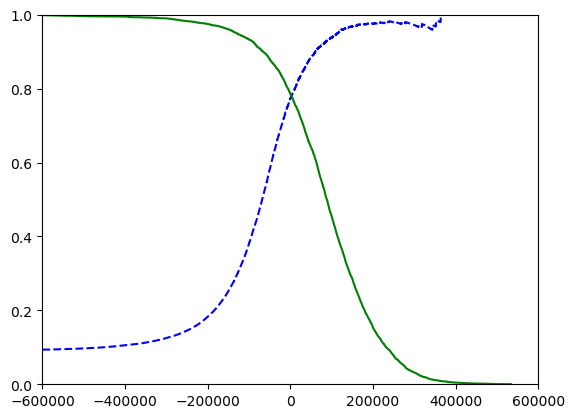

In [147]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.ylim([0,1])
    plt.xlim([-600000,600000])
    
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### ROC curves  
Y-axis is true positive rate(TPR) and X-axis is false positive rate(FPR)

In [148]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

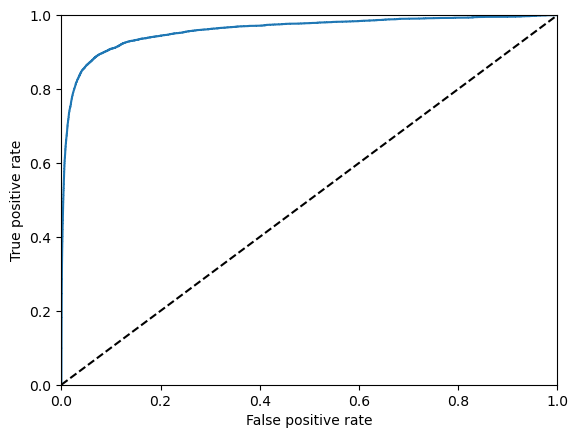

In [149]:
plot_roc_curve(fpr,tpr)
plt.show()

AUC area under curve, the perfect classifier's AUC is 1

In [150]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9597417516899552